IMPORT REQUIRED LIBRARIES


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter
import string

LOAD PROCESSED DATASET

In [2]:
df = pd.read_csv("D:/AI Echo Your Smartest Conversational Partner/processed_reviews.csv")

In [3]:
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,text,sentiment
0,2025-02-15,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No,{'sentences': ['Mother former community upon v...,Positive
1,2024-10-16,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes,{'sentences': ['General paper understand main....,Positive
2,2024-10-16,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes,{'sentences': ['Here situation his high stage....,Positive
3,2024-12-21,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes,{'sentences': ['Rule court behind growth reali...,Negative
4,2025-03-23,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No,{'sentences': ['Case opportunity season road w...,Positive


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               10000 non-null  datetime64[ns]
 1   title              10000 non-null  object        
 2   review             10000 non-null  object        
 3   rating             10000 non-null  int64         
 4   username           10000 non-null  object        
 5   helpful_votes      10000 non-null  int64         
 6   review_length      10000 non-null  int64         
 7   platform           10000 non-null  object        
 8   language           10000 non-null  object        
 9   location           10000 non-null  object        
 10  version            10000 non-null  float64       
 11  verified_purchase  10000 non-null  object        
 12  text               10000 non-null  object        
 13  sentiment          10000 non-null  object        
dtypes: date

Text(0.5, 1.0, 'Sentiments Distribution')

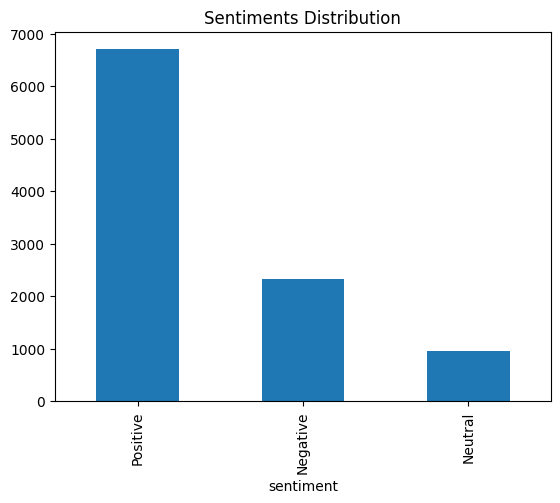

In [17]:
df["sentiment"].value_counts().plot.bar()
plt.title("Sentiments Distribution")

The dataset appears to be heavily imbalanced, with significantly more "Positive" reviews than "Negative" or "Neutral" reviews. This imbalance can bias the model toward the majority class.

<h3>1. What is the distribution of review ratings?</h3>

C:\Users\sures\AppData\Local\Temp\ipykernel_4532\3231014422.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis")


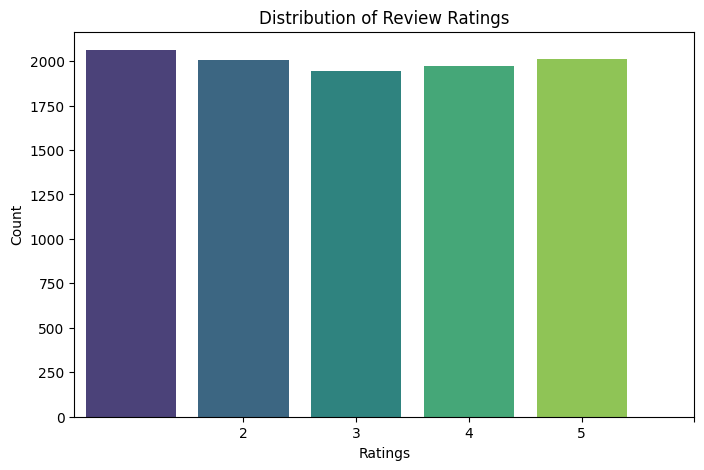

In [7]:

# Count the occurrences of each rating
rating_counts = df["rating"].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(8,5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis")
plt.title("Distribution of Review Ratings")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.xticks(rating_counts.index)  # Ensure correct x-axis labels
plt.show()

 <h3>2. How many reviews were marked as helpful (above a certain threshold)?</h3>

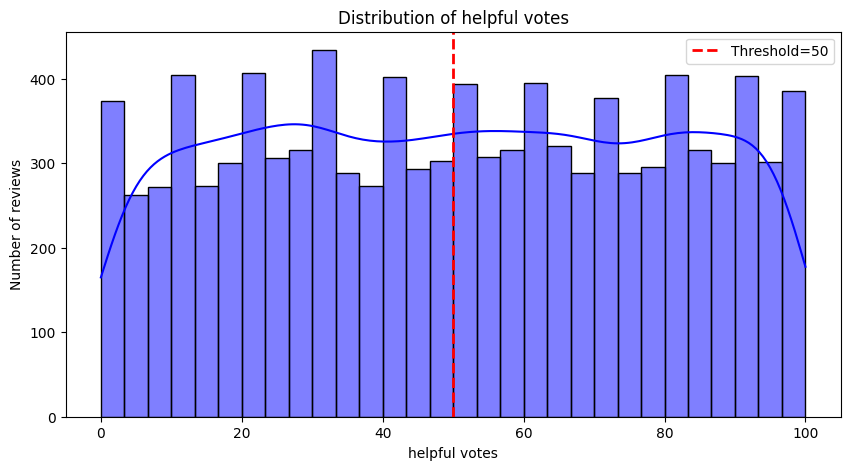

In [8]:
#define threshold
threshold = 50
helpful_reviews = df[df["helpful_votes"] > threshold]

plt.figure(figsize=(10,5))
sns.histplot(df['helpful_votes'],bins=30,kde=True,color='blue')
plt.axvline(threshold,color='red',linestyle='dashed',linewidth=2,label=f'Threshold={threshold}')
plt.title("Distribution of helpful votes")
plt.xlabel("helpful votes")
plt.ylabel("Number of reviews")
plt.legend()
plt.show()

✅ The helpful votes are fairly spread out, with no extreme peaks.
✅ The red dashed line (Threshold = 50) helps distinguish helpful reviews.
✅ Many reviews have less than 50 votes, but a good number exceed the threshold.

<h3>3. Most common keywords in positive vs. negative reviews</h3>


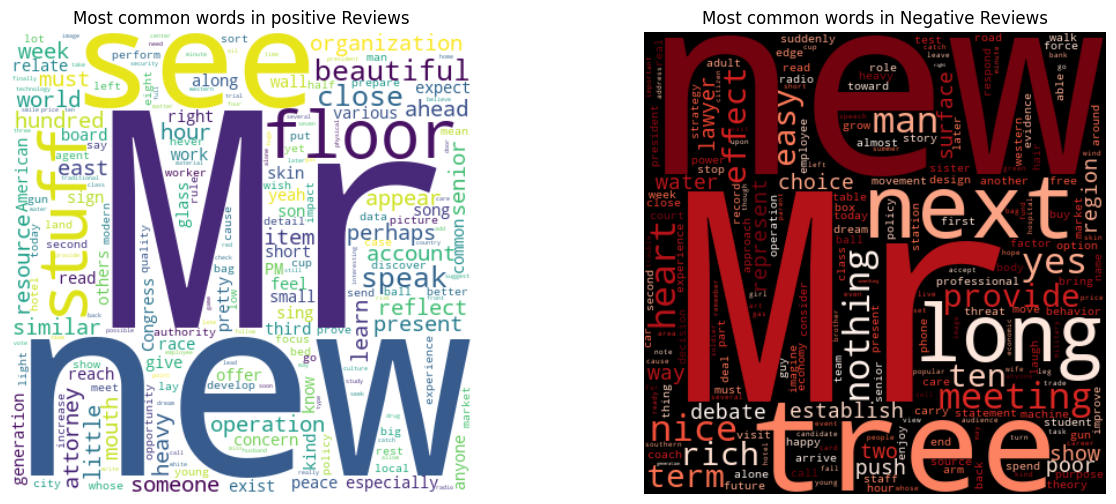

In [9]:
# Convert processed_review column from string to dictionary
df["text"] = df["text"].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Extract lemmatized words from processed_review
df["lemmatized_text"] = df["text"].apply(lambda x: " ".join(x["lemmatized_words"]))

# Separate positive and negative reviews
positive_text = " ".join(df[df["rating"] >=4]["lemmatized_text"])
negative_text = " ".join(df[df["rating"] <=2]["lemmatized_text"])

# generte word cloud

fig, ax = plt.subplots(1,2,figsize=(15,6))

wordcloud_pos = WordCloud(width=400, height=400, background_color="white").generate(positive_text)
wordcloud_neg = WordCloud(width=400, height=400, background_color="black", colormap="Reds").generate(negative_text)

ax[0].imshow(wordcloud_pos,interpolation = 'bilinear')
ax[0].set_title("Most common words in positive Reviews")
ax[0].axis("off")


ax[1].imshow(wordcloud_neg,interpolation = 'bilinear')
ax[1].set_title("Most common words in Negative Reviews")
ax[1].axis("off")

plt.show()


🔍 Observations

✅ Positive Reviews (Left Word Cloud - White Background)

Common words: "Mr", "see", "beautiful", "organization", "floor", "new", "close", "speak"

Likely positive themes: Users seem to appreciate beauty, organization, and clarity.

✅ Negative Reviews (Right Word Cloud - Black Background)

Common words: "Mr", "new", "long", "poor", "push", "effect", "meeting", "tree"

Likely negative themes: Users may complain about long processes, poor quality, and ineffective results.

<h3>4. Average rating changed over time</h3>

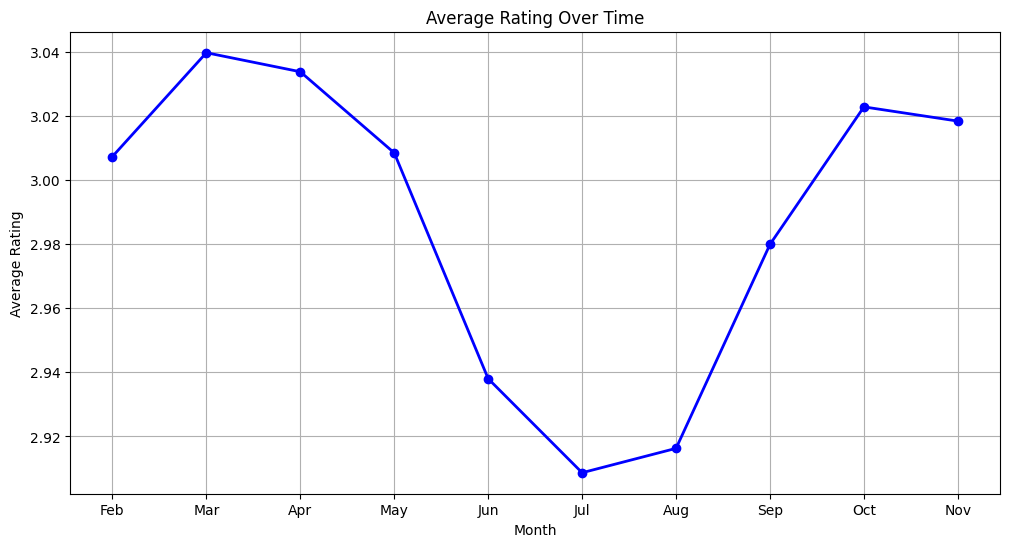

In [10]:
# Extract month names and numerical month order
df["month"] = df["date"].dt.month
df["month_name"] = df["date"].dt.strftime('%b')  # 'Jan', 'Feb', etc.

# Group by month and compute average rating
average_rating_trend = df.groupby(["month", "month_name"])["rating"].mean().reset_index()

# Sort by the actual calendar month order
average_rating_trend = average_rating_trend.sort_values("month")

# Apply a rolling average (3-month window)
average_rating_trend["smooth_rating"] = average_rating_trend["rating"].rolling(window=3, center=True).mean()

plt.figure(figsize=(12,6))
plt.plot(average_rating_trend["month_name"], average_rating_trend["smooth_rating"],marker='o',linestyle='-',linewidth=2,color='blue',label='Average Rating')

plt.title("Average Rating Over Time")
plt.xlabel("Month")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

<h3>5. How do ratings vary by user location?</h3>

C:\Users\sures\AppData\Local\Temp\ipykernel_4532\842662221.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_locations["location"][:10], x=top_locations["rating"], palette="Greens_r", label="Top 10")


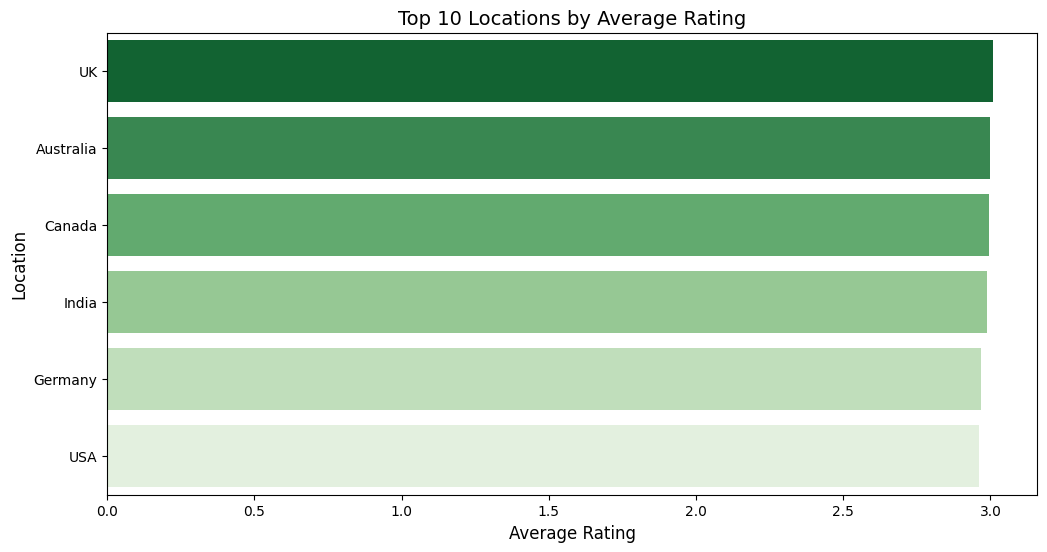

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by location and calculate average rating
location_ratings = df.groupby("location")["rating"].mean().reset_index()

# Sort by rating (optional: filter only locations with enough reviews)
top_locations = location_ratings.sort_values(by="rating", ascending=False).head(10)

# Plot top 10 locations with highest & lowest ratings
plt.figure(figsize=(12, 6))
sns.barplot(y=top_locations["location"][:10], x=top_locations["rating"], palette="Greens_r", label="Top 10")

# Formatting
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Location", fontsize=12)
plt.title("Top 10 Locations by Average Rating", fontsize=14)
plt.show()


<h3>6. Which platform (Web vs Mobile) gets better reviews?</h3>

C:\Users\sures\AppData\Local\Temp\ipykernel_4532\1911816119.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_avg_rating.index, y=platform_avg_rating.values, palette='coolwarm')


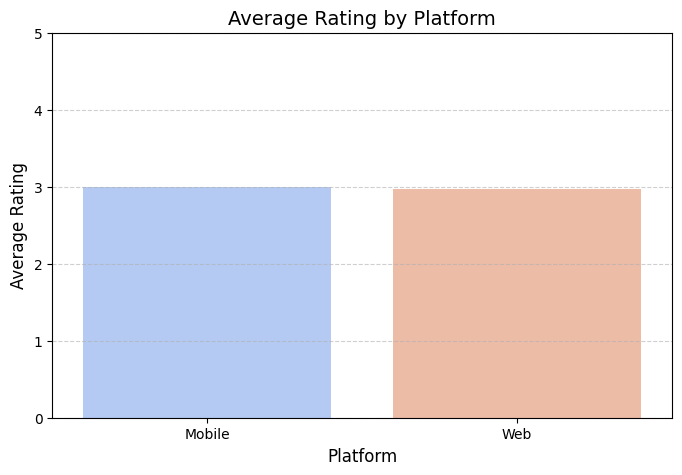

In [12]:
# Grouping and calculating average rating by platform
platform_avg_rating = df.groupby('platform')['rating'].mean()

# Plotting
plt.figure(figsize=(8,5))
sns.barplot(x=platform_avg_rating.index, y=platform_avg_rating.values, palette='coolwarm')

plt.title("Average Rating by Platform", fontsize=14)
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.ylim(0, 5)  # Assuming rating scale is 0-5
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the plot
plt.show()


<h3>7. Are verified users more satisfied than non-verified ones?</h3>

C:\Users\sures\AppData\Local\Temp\ipykernel_4532\1349753414.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=verified_avg_rating.index, y=verified_avg_rating.values, palette='viridis')


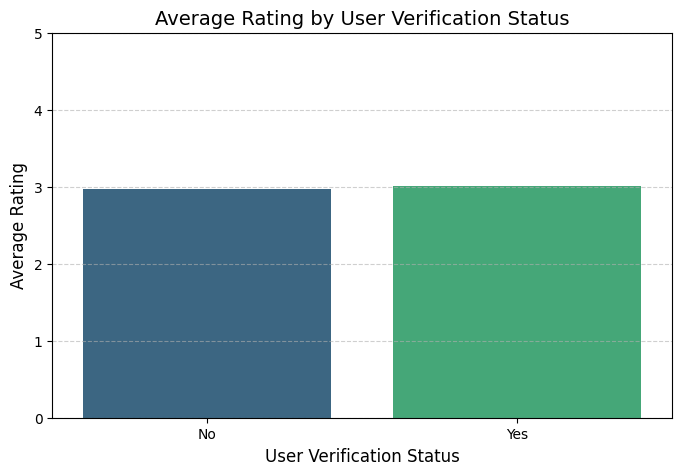

In [13]:

# Grouping data by verification status and calculating average rating
verified_avg_rating = df.groupby('verified_purchase')['rating'].mean()

# Plotting
plt.figure(figsize=(8,5))
sns.barplot(x=verified_avg_rating.index, y=verified_avg_rating.values, palette='viridis')

# Titles and labels
plt.title("Average Rating by User Verification Status", fontsize=14)
plt.xlabel("User Verification Status", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.ylim(0, 5)  # Assuming rating scale is 0-5
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show plot
plt.show()


As We Expected,verifier user Rating is More Than the Non verified Users.

<h3>8. What’s the average length of reviews per rating category?</h3>

C:\Users\sures\AppData\Local\Temp\ipykernel_4532\86639485.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_review_length.index, y=average_review_length.values, palette="coolwarm")


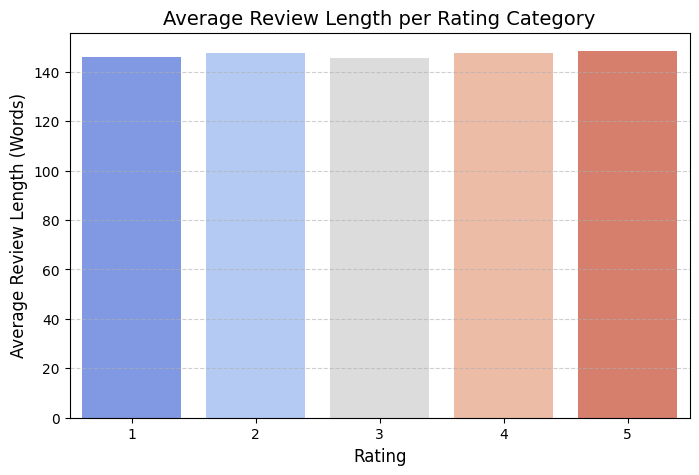

In [14]:
average_review_length = df.groupby("rating")["review_length"].mean()


plt.figure(figsize=(8,5))
sns.barplot(x=average_review_length.index, y=average_review_length.values, palette="coolwarm")

# Titles and labels
plt.title("Average Review Length per Rating Category", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Average Review Length (Words)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show plot
plt.show()

🔍 Possible Insights:

No major difference in review length – Users tend to write reviews of similar lengths regardless of whether they rate 1 or 5.

Higher ratings don't necessarily mean shorter/longer reviews – If review length was much longer for low ratings, it could indicate detailed complaints, but that doesn't seem to be the case.

Further analysis needed – You could check the distribution of review lengths for each rating to see if there are outliers or trends (e.g., histograms or box plots).

<h3>9. The most mentioned words in 1-star reviews</h3>

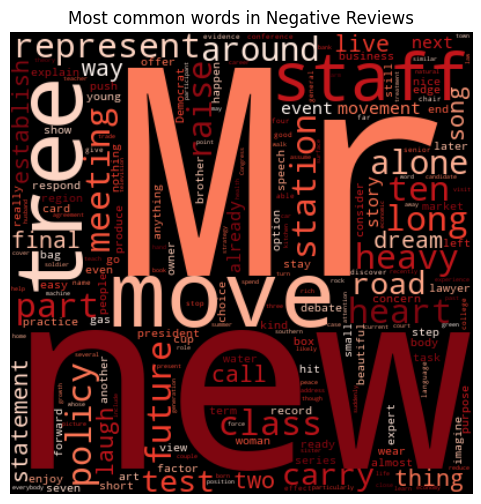

In [15]:
# Convert processed_review column from string to dictionary
df["text"] = df["text"].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Extract lemmatized words from processed_review
df["lemmatized_text"] = df["text"].apply(lambda x: " ".join(x["lemmatized_words"]))

# Separate positive and negative reviews
negative_text = " ".join(df[df["rating"] <=1]["lemmatized_text"])

# generte word cloud

plt.figure(figsize=(15,6))

wordcloud_neg = WordCloud(width=400, height=400, background_color="black", colormap="Reds").generate(negative_text)

plt.imshow(wordcloud_neg,interpolation = 'bilinear')
plt.title("Most common words in Negative Reviews")
plt.axis("off")

plt.show()

<h3>10. What ChatGPT version received the highest average rating?</h3>

C:\Users\sures\AppData\Local\Temp\ipykernel_4532\3473271193.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rating_per_version.index, y=average_rating_per_version.values, palette="viridis")


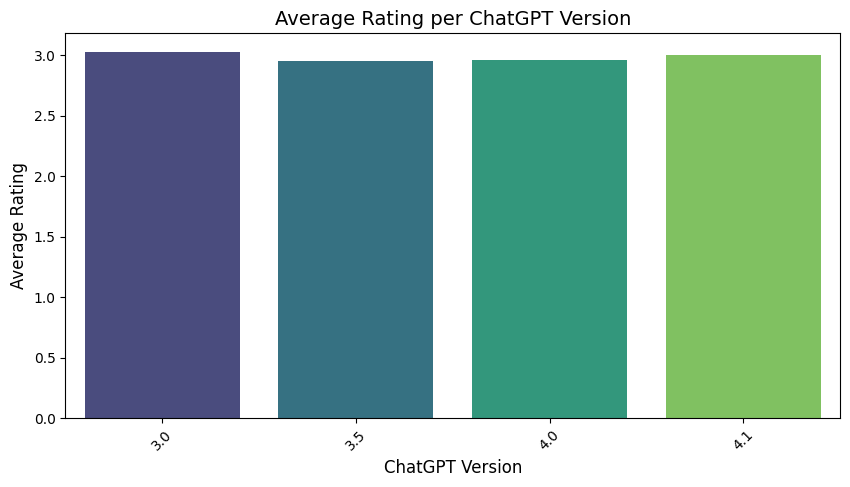

In [16]:
# Group by version and calculate the average rating
average_rating_per_version = df.groupby("version")["rating"].mean()

# Sort in descending order
average_rating_per_version = average_rating_per_version.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=average_rating_per_version.index, y=average_rating_per_version.values, palette="viridis")

# Titles and labels
plt.title("Average Rating per ChatGPT Version", fontsize=14)
plt.xlabel("ChatGPT Version", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show plot
plt.show()


As We See, version 3.0 and version 4.1 has more rating than other versions.